# GRIB2-CMA GEPS
This notebook provides an example on how to decode GRIB2 data using the pygrib library. In this example, we will read the Global Ensemble Prediction System of China Meteorological Administration (CMA-GEPS) and display all variables on maps.<br>
<br>
__Data Description__<br>
The Global Ensemble Prediction System of China Meteorological Administration (CMA-GEPS) carries out physics calculations to arrive at probabilistic predictions of atmospheric elements from the current day out to 15 days. The CMA-GEPS produces different forecasts to estimate the forecast uncertainties due to the nonlinear (chaotic) nature of the atmosphere. The probabilistic predictions are based on an ensemble of 30 perturbed members that differ in their initial conditions with Singular Vectors (SVs), their model uncertainties which are randomly perturbed by Stochastic Physics Perturbation Tendency (SPPT) method, and the Stochastic Kinetic Energy Backscatter (SKEB). A control member that is not perturbed is also available. <br>
Weather elements include temperature, precipitation, wind speed, gust and others. <br>
This product contains raw numerical results of these members. <br>
Geographical coverage is global. Data is available on a global latitude-longitude uniform grid with 0.5 degree horizontal resolution. <br>
Predictions are performed twice a day and initial conditions are at 00 UTC and 12 UTC.<br>
<br>
As part of the WIS2 Training you will be asked to download some data from the WIS2-broker hosted at wis2training-broker.wis2dev.io and use it in this notebook. If you want to run this notebook on your local machine, you can use the sample-data included in this notebook instead.<br>
<br>
The following references were used to create this notebook:<br>
- Sample data from <https://wis2node.wis.cma.cn/oapi/collections/discovery-metadata/items/urn:wmo:md:cn-cma:data.core.weather.prediction.forecast.medium-range.probabilistic.global>
- Python code to load GRIB data, see <https://pypi.org/project/pygrib/><br>

Execute each block of code by selecting it and pressing ``Shift+Enter`` or clicking the ``Run`` button in the toolbar above.

# Data decode
The following block imports the required modules for reading GRIB data, numerical computing, visualization, and cartographic mapping:  

The following modules are imported:  

- **pygrib**: Python interface for reading and writing GRIB (Gridded Binary) files, enabling extraction of meteorological data (e.g., loading forecast fields like temperature or wind).  
- **numpy**: Numerical Python library for efficient array operations and mathematical computations (e.g., `np.array` for handling gridded data).  
- **matplotlib**: Plotting library for creating static, interactive, or animated visualizations (e.g., `plt` for rendering maps or graphs).  
- **cartopy**: Cartographic library for geospatial data visualization, offering map projections and geographic features (e.g., `ccrs` for coordinate reference systems, `cfeature` for adding coastlines or borders).  

This setup is typically used for analyzing and visualizing meteorological or climate data stored in GRIB format, with **pygrib** handling data ingestion and the remaining modules supporting processing and mapping tasks.


## **pygrib**  
**Python library for reading GRIB files (editions 1 and 2)**, enabling access to meteorological and climate data stored in GRIB format. Requires the **ECCODES C library** as a dependency.  

### **Recommended Installation (Conda)**  
For Anaconda/Miniconda users, the simplest method is:  
```bash
conda install -c conda-forge pygrib
```  
This automatically resolves dependencies (e.g., ECCODES, numpy, pyproj).  

### **Verification**  
Test installation with:  
```python
import pygrib
print(pygrib.__version__)  # Should output the installed version (e.g., `2.1.6`)
```  

In [1]:
import pygrib
import numpy as np 

grib_file = "Z_NAFP_C_BABJ_20250818000000_P_CMA-GEPS-GLB-036.grib2"

In [2]:
grbs = pygrib.open(grib_file)
print("GRIB file contents:")
for grb in grbs:
    print(grb)

GRIB file contents:
1:Total precipitation:kg m-2 (accum):regular_ll:surface:level 0:fcst time 12-36 hrs (accum):from 202508180000:71 (0.01-0.01)
2:Total precipitation:kg m-2 (accum):regular_ll:surface:level 0:fcst time 12-36 hrs (accum):from 202508180000:Reserved for local use (0.05-0.05)
3:Total precipitation:kg m-2 (accum):regular_ll:surface:level 0:fcst time 12-36 hrs (accum):from 202508180000:177 (0.1-0.1)
4:Total precipitation:kg m-2 (accum):regular_ll:surface:level 0:fcst time 12-36 hrs (accum):from 202508180000:Reserved for local use (0.25-0.25)
5:Total precipitation:kg m-2 (accum):regular_ll:surface:level 0:fcst time 12-36 hrs (accum):from 202508180000:Reserved for local use (0.5-0.5)
6:Total precipitation:kg m-2 (accum):regular_ll:surface:level 0:fcst time 12-36 hrs (accum):from 202508180000:63 (1.0-1.0)
7:Temperature anomaly:K (instant):regular_ll:isobaricInhPa:level 85000 Pa:fcst time 36 hrs:from 202508180000:135 (-21474836.46--21474836.46)
8:Temperature anomaly:K (instant):

In [3]:
try:
    grbs = pygrib.open(grib_file)
      
    for idx in range(1, len(list(grbs)) + 1):
        grb = grbs.message(idx)
        
        try:
            data, lats, lons = grb.data()
            has_data = True
        except Exception as e:
            has_data = False
            print(f"\nMessage {idx} Warning: Failed to extract data - {str(e)}")
        
        print(f"\nMessage {idx} Details:")
        print(f"Parameter Name: {grb.parameterName}")
        print(f"Units: {grb.units}")
        print(f"Type of Level: {grb.typeOfLevel}")
        print(f"Level: {grb.level}")
        
        if has_data:
            print(f"Data Shape: {data.shape}")
            print(f"Latitude Range: {np.nanmin(lats):.2f} ~ {np.nanmax(lats):.2f}")
            print(f"Longitude Range: {np.nanmin(lons):.2f} ~ {np.nanmax(lons):.2f}")
            print(f"Data Min: {np.nanmin(data):.2f}")
            print(f"Data Max: {np.nanmax(data):.2f}")
        else:
            print("No grid data available for this message")

    grbs.close()

except FileNotFoundError:
    print(f"Error: The file '{grib_file}' was not found.")
except pygrib.PyGribError as e:
    print(f"PyGrib Error: Failed to read GRIB file - {str(e)}")
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")


Message 1 Details:
Parameter Name: Total precipitation
Units: unknown
Type of Level: surface
Level: 0
Data Shape: (360, 720)
Latitude Range: -89.75 ~ 89.75
Longitude Range: 0.00 ~ 359.50
Data Min: 0.00
Data Max: 100.00

Message 2 Details:
Parameter Name: Total precipitation
Units: unknown
Type of Level: surface
Level: 0
Data Shape: (360, 720)
Latitude Range: -89.75 ~ 89.75
Longitude Range: 0.00 ~ 359.50
Data Min: 0.00
Data Max: 100.00

Message 3 Details:
Parameter Name: Total precipitation
Units: unknown
Type of Level: surface
Level: 0
Data Shape: (360, 720)
Latitude Range: -89.75 ~ 89.75
Longitude Range: 0.00 ~ 359.50
Data Min: 0.00
Data Max: 100.00

Message 4 Details:
Parameter Name: Total precipitation
Units: unknown
Type of Level: surface
Level: 0
Data Shape: (360, 720)
Latitude Range: -89.75 ~ 89.75
Longitude Range: 0.00 ~ 359.50
Data Min: 0.00
Data Max: 100.00

Message 5 Details:
Parameter Name: Total precipitation
Units: unknown
Type of Level: surface
Level: 0
Data Shape: (360,

# Visualization

In [4]:
import pygrib
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colorbar import ColorbarBase
from matplotlib.patches import Rectangle

In [5]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Display only one variable (eg, Temperature anomaly)

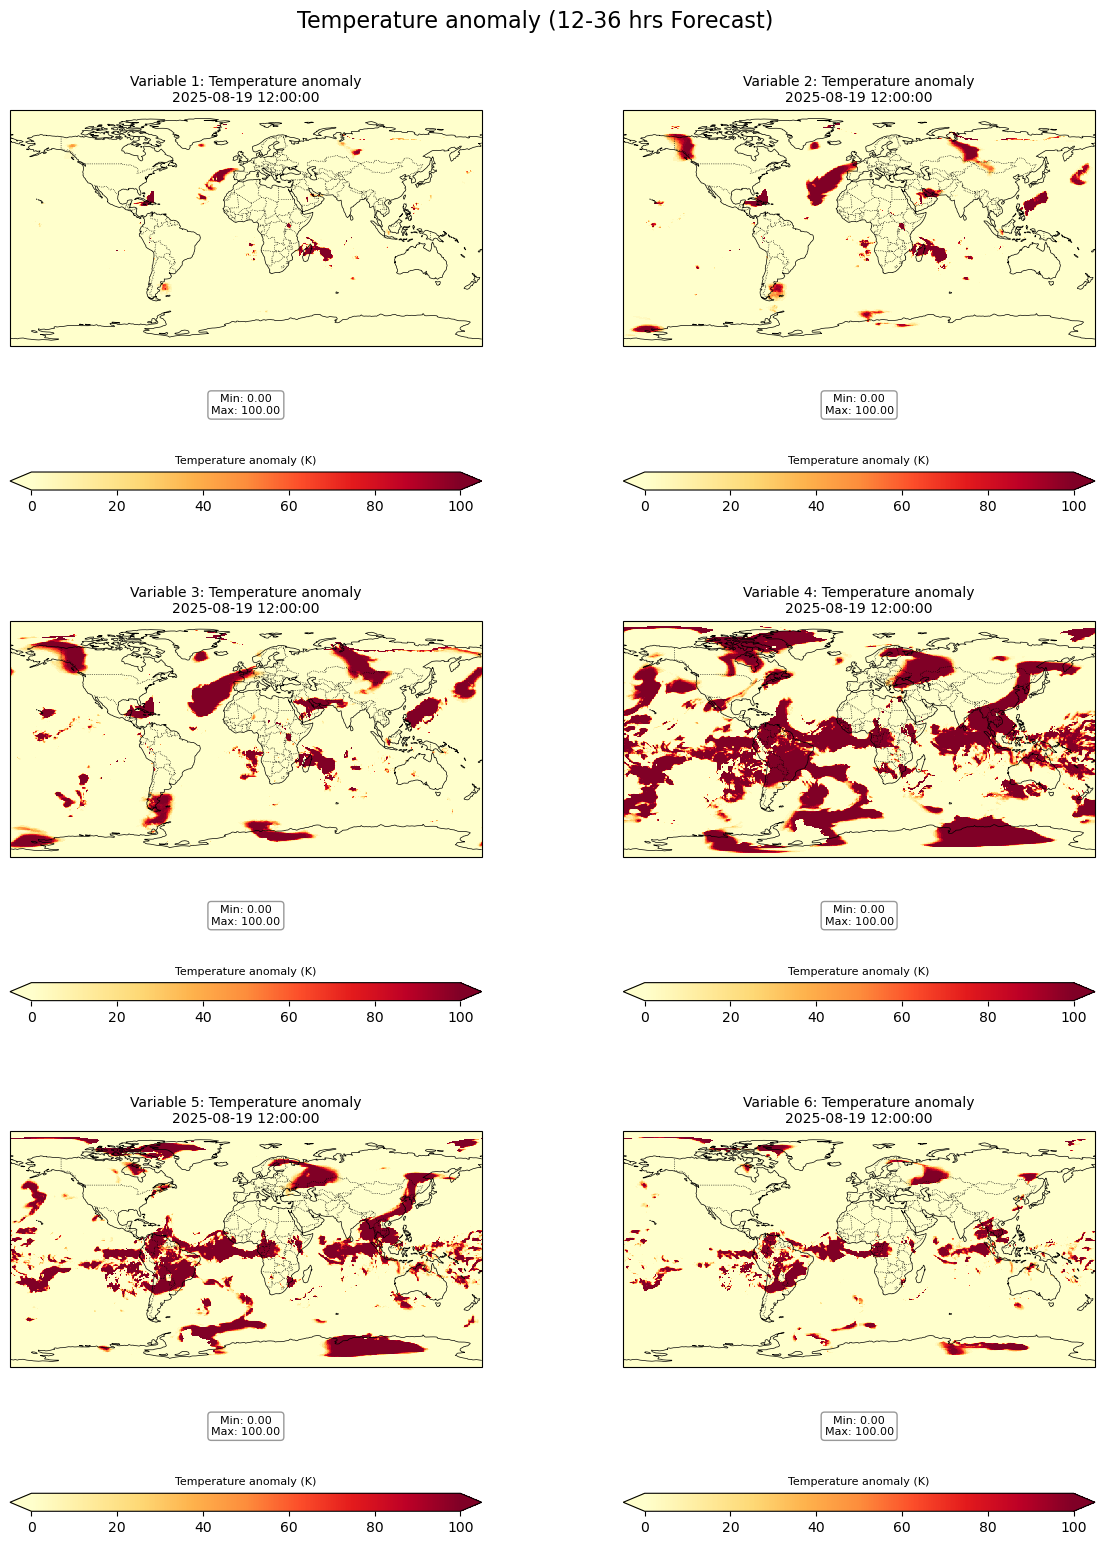

In [6]:
grbs = pygrib.open(grib_file)
# Filter temperature-related variables
temp_vars = []
for grb in grbs:
    if "Temperature anomaly" in grb.parameterName:
        temp_vars.append(grb)
        if len(temp_vars) >= 6:
            break

if len(temp_vars) < 6:
    raise ValueError(f"Only found {len(temp_vars)} temperatue variables, need at least 6!")

# Create figure and subplots
fig, axes = plt.subplots(
    nrows=3, ncols=2,
    figsize=(14, 18),
    subplot_kw={"projection": ccrs.PlateCarree()}
)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

cmap = "YlOrRd"

for i, (grb, ax) in enumerate(zip(temp_vars, axes.flat), 1):
    # Extract data
    data, lats, lons = grb.data()
    data_min, data_max = np.nanmin(data), np.nanmax(data)
    
    # Ensure global display
    ax.set_global()
    
    # Add map features
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linestyle=":", linewidth=0.5)
    ax.add_feature(cfeature.LAND, edgecolor="black", facecolor="lightgray")
    
    # Plot data
    mesh = ax.pcolormesh(
        lons, lats, data,
        cmap=cmap,
        vmin=data_min, vmax=data_max,
        transform=ccrs.PlateCarree()
    )
    
    # Create colorbar matching subplot width
    pos = ax.get_position()
    cax = fig.add_axes([pos.x0, pos.y0 - 0.08, pos.width, 0.01])  # Adjust colorbar position and height
    
    # Create colorbar
    norm = plt.Normalize(vmin=data_min, vmax=data_max)
    ColorbarBase(cax, cmap=cmap, norm=norm, orientation='horizontal', extend='both')
    cax.set_title(f"{grb.parameterName} ({grb.units})", fontsize=8)
    
    # Display min/max values
    ax.text(
        0.5, -0.25,
        f"Min: {data_min:.2f}\nMax: {data_max:.2f}",
        transform=ax.transAxes,
        ha="center", va="center",
        fontsize=8,
        bbox=dict(facecolor="white", alpha=0.8, edgecolor="gray", boxstyle="round")
    )
    
    # Set title
    ax.set_title(f"Variable {i}: {grb.parameterName}\n{grb.validDate}", fontsize=10)

# Close unused subplots
for j in range(len(temp_vars), 6):
    fig.delaxes(axes.flat[j])

# Display plot
plt.suptitle("Temperature anomaly (12-36 hrs Forecast)", fontsize=16, y=0.9)
plt.show()

grbs.close()